In [1]:
# Importing Packages
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt
from astropy.wcs import WCS
from photutils import DAOStarFinder
from astropy.stats import mad_std
from photutils import aperture_photometry, CircularAperture, CircularAnnulus
from glob import glob
plt.rcParams["figure.figsize"] = (10,10)
import datetime
from datetime import timedelta
from scipy.optimize import curve_fit, least_squares, leastsq

%matplotlib inline 

In [2]:
nnSer = fits.open('data_2019/Filtered_Images/Final_NNSer.fits')[0].data 

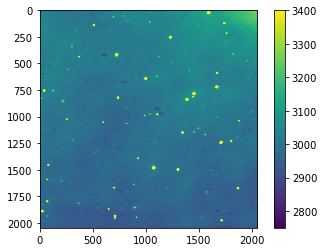

In [3]:
plt.imshow(nnSer,vmin=2750,vmax=3400) # master image of nnSer
plt.colorbar();

In [4]:
bkg_sigma = mad_std(nnSer) # finding median absolute deviation of image

daofind = DAOStarFinder(fwhm=6.,threshold=5.*bkg_sigma) # finds sources of high density in image with intensities higher than 5 sigma
                                                        # creates instance of class
sources = daofind(nnSer) # instantiates an object

sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,2.1823204069807347,2.1725486880626046,0.41062805849416506,0.15794532665553215,0.005304612220199741,49,0.0,3037.8945990053594,19.554607927984215,-3.2281227818096134
2,2044.8107966384464,2.2216673219599468,0.3960527612382083,-0.15255402511857405,0.01640246066002647,49,0.0,3200.750910482261,20.82154802271949,-3.2962825373278166
3,1584.0549606760485,24.253269737116618,0.4200637911234506,-0.2856949238604411,-0.5419051590803684,49,0.0,22761.5528220684,83.75816942316828,-4.807567942626573
4,781.0980969909664,55.36028531967004,0.21252790229478735,0.0801216267936524,-0.3721961084483286,49,0.0,3349.033680382973,1.1732330735724714,-0.17346074322858798
5,688.2873739901283,64.73843246715697,0.40096832073241145,-0.2463805269491821,-0.28584383351939413,49,0.0,3954.725814083911,4.462250817092502,-1.623884944350622
6,1030.195962622176,112.14645772056029,0.42549660812646894,-0.15636927675699186,-0.4123268203688376,49,0.0,3875.1007818753205,3.5942514130895584,-1.3890211303871947
7,1729.982859434652,124.75760144173512,0.4137818393975546,-0.2704581750871887,-0.633269159815152,49,0.0,6360.19221163501,14.423120711986575,-2.897648095716099
8,505.05216874004844,141.57671564461313,0.42963375035498896,-0.19534084021041487,-0.26420282302317805,49,0.0,7847.561852699725,23.46892998430304,-3.426233223303456
9,330.268301226896,191.41245394166492,0.4914606448362081,-0.17107728215944468,-0.2852817932285558,49,0.0,3436.8566040660194,1.6705373685458316,-0.5571404872321963


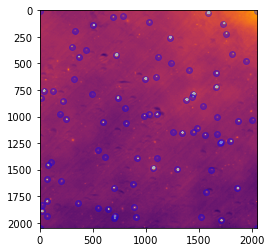

In [5]:
plt.imshow(nnSer,cmap='inferno',vmin=2750,vmax=3400)
plt.scatter(sources['xcentroid'],sources['ycentroid'],alpha=0.3,color='blue'); # highlight each source

In [6]:
positions = np.transpose((sources['xcentroid'],sources['ycentroid'])) # putting point sources in array
aperture = CircularAperture(positions,r=6) # finding circular apertures around each source
annulus_aperture = CircularAnnulus(positions,r_in=10.,r_out=15.) # finding annulus around each source
apers = (aperture, annulus_aperture) # putting the aperture and annulus together in a tuple
phot_table = aperture_photometry(nnSer,apers) # do the photometry on the objects
type(nnSer)

numpy.ndarray

In [7]:
# Get positions of sources in the field from the table above

positions = np.transpose((sources['xcentroid'],sources['ycentroid']))

# Set up aperture and annulus
aperture = CircularAperture(positions,r=6)
annulus_aperture = CircularAnnulus(positions,r_in=10.,r_out=15.)

# Make a list of apertures
apers = (aperture, annulus_aperture)

# And run aperture photometry
phot_table = aperture_photometry(nnSer,apers)

# We calculate the mean counts in each pixel in the background annulus, and then multiply by the area in the aperture 
# to get the total background counts within each aperture
bkg_mean = phot_table['aperture_sum_1']/annulus_aperture.area
bkg_sum = bkg_mean + aperture.area

# Now we get the final table of background subtracted counts within each aperture
final_sum = phot_table['aperture_sum_0'] - bkg_sum

In [8]:
# We can convert to magnitude with 
magnitudes = -2.5*np.log10(final_sum)

In [9]:
# ------------------- Demo Over ---------------------

## Sample Image

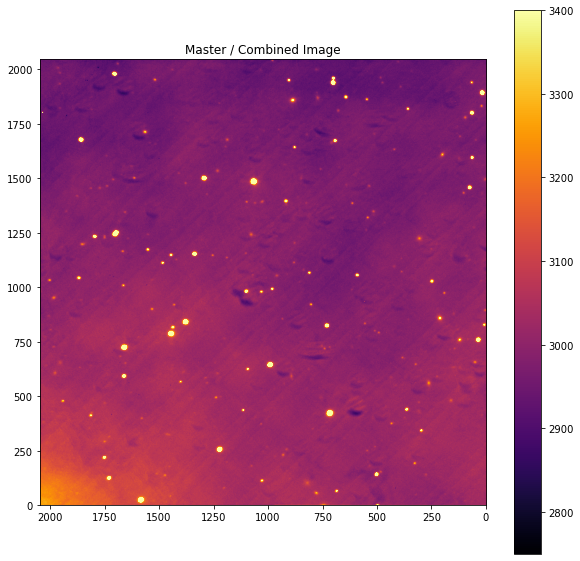

In [10]:
files = glob('data_2019/Filtered_Images/nnSer/*') # filtered master image of NN Ser
correctedFiles = np.sort(files)
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(nnSer,cmap = 'inferno',vmin=2750,vmax=3400)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.colorbar()
plt.title('Master / Combined Image');

In [11]:
backgroundStd = mad_std(nnSer)
daofind = DAOStarFinder(fwhm=6.,threshold=5.*backgroundStd)
objectPositions = daofind(nnSer)
objectPositions # testing code and looking at results

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,2.1823204069807347,2.1725486880626046,0.41062805849416506,0.15794532665553215,0.005304612220199741,49,0.0,3037.8945990053594,19.554607927984215,-3.2281227818096134
2,2044.8107966384464,2.2216673219599468,0.3960527612382083,-0.15255402511857405,0.01640246066002647,49,0.0,3200.750910482261,20.82154802271949,-3.2962825373278166
3,1584.0549606760485,24.253269737116618,0.4200637911234506,-0.2856949238604411,-0.5419051590803684,49,0.0,22761.5528220684,83.75816942316828,-4.807567942626573
4,781.0980969909664,55.36028531967004,0.21252790229478735,0.0801216267936524,-0.3721961084483286,49,0.0,3349.033680382973,1.1732330735724714,-0.17346074322858798
5,688.2873739901283,64.73843246715697,0.40096832073241145,-0.2463805269491821,-0.28584383351939413,49,0.0,3954.725814083911,4.462250817092502,-1.623884944350622
6,1030.195962622176,112.14645772056029,0.42549660812646894,-0.15636927675699186,-0.4123268203688376,49,0.0,3875.1007818753205,3.5942514130895584,-1.3890211303871947
7,1729.982859434652,124.75760144173512,0.4137818393975546,-0.2704581750871887,-0.633269159815152,49,0.0,6360.19221163501,14.423120711986575,-2.897648095716099
8,505.05216874004844,141.57671564461313,0.42963375035498896,-0.19534084021041487,-0.26420282302317805,49,0.0,7847.561852699725,23.46892998430304,-3.426233223303456
9,330.268301226896,191.41245394166492,0.4914606448362081,-0.17107728215944468,-0.2852817932285558,49,0.0,3436.8566040660194,1.6705373685458316,-0.5571404872321963


In [12]:
np.where(objectPositions['flux']==min(objectPositions['flux']))

(array([59]),)

Text(0.5, 1.0, 'Anotated NN Serpentis Master Image')

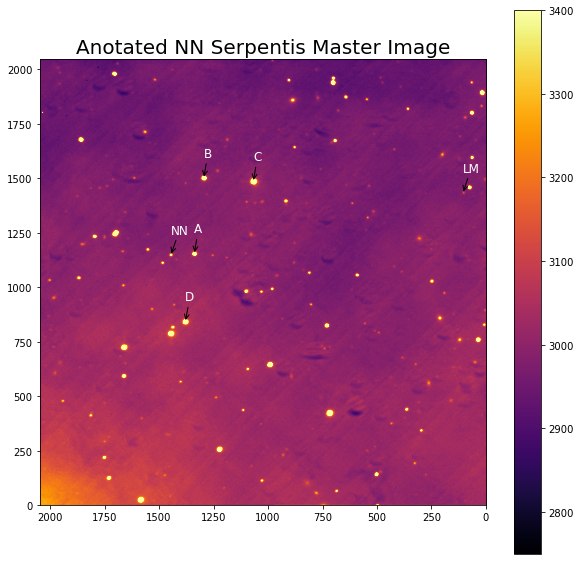

In [13]:
# Identifying the known sources and plotting on image
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(nnSer,cmap='inferno',vmin=2750,vmax=3400)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.colorbar()

#Annotating every source and comparing to known sources

#plt.scatter(objectPositions['xcentroid'],objectPositions['ycentroid'],alpha=0.3,color='white');
#for i in range(85):
    #plt.annotate(i,(objectPositions['xcentroid'][i],objectPositions['ycentroid'][i]),color='white', size='large')

plt.annotate('NN',(objectPositions['xcentroid'][48],objectPositions['ycentroid'][48]),color='white', size='large',xytext=(objectPositions['xcentroid'][48],objectPositions['ycentroid'][48]+100),arrowprops={'arrowstyle':'->'})
plt.annotate('A',(objectPositions['xcentroid'][49],objectPositions['ycentroid'][49]),color='white', size='large',xytext=(objectPositions['xcentroid'][49],objectPositions['ycentroid'][49]+100),arrowprops={'arrowstyle':'->'})
plt.annotate('C',(objectPositions['xcentroid'][61],objectPositions['ycentroid'][61]),color='white', size='large',xytext=(objectPositions['xcentroid'][61],objectPositions['ycentroid'][61]+100),arrowprops={'arrowstyle':'->'})
plt.annotate('B',(objectPositions['xcentroid'][62],objectPositions['ycentroid'][62]),color='white', size='large',xytext=(objectPositions['xcentroid'][62],objectPositions['ycentroid'][62]+100),arrowprops={'arrowstyle':'->'})
plt.annotate('D',(objectPositions['xcentroid'][32],objectPositions['ycentroid'][32]),color='white', size='large',xytext=(objectPositions['xcentroid'][32],objectPositions['ycentroid'][32]+100),arrowprops={'arrowstyle':'->'})
plt.annotate('LM',(objectPositions['xcentroid'][59],objectPositions['ycentroid'][59]),color='white', size='large',xytext=(objectPositions['xcentroid'][59],objectPositions['ycentroid'][59]+100),arrowprops={'arrowstyle':'->'})

plt.title('Anotated NN Serpentis Master Image',fontsize=20)
#plt.savefig('annotaed_nnSer.eps')

From this graph it appears that the objects of known magnitude from the digital sky survey finding chart are as follows : 

B = 62,
C = 61,
NN = 48,
A = 49,
D = 32,
LM = 59

In [14]:
# Get positions of sources in the field from the table above

masterPositions = np.transpose((objectPositions['xcentroid'],objectPositions['ycentroid']))

# Set up aperture and annulus
aperture = CircularAperture(masterPositions,r=6)
annulus_aperture = CircularAnnulus(masterPositions,r_in=10.,r_out=15.)

# Make a list of apertures
apers = (aperture, annulus_aperture)

# And run aperture photometry
phot_table = aperture_photometry(nnSer,apers)

# We calculate the mean counts in each pixel in the background annulus, and then multiply by the area in the aperture 
# to get the total background counts within each aperture
bkg_mean = phot_table['aperture_sum_1']/annulus_aperture.area
bkg_sum = bkg_mean + aperture.area

# Now we get the final table of background subtracted counts within each aperture
final_sum = phot_table['aperture_sum_0'] - bkg_sum

In [15]:
aperture.area, annulus_aperture.area

(113.09733552923255, 392.6990816987241)

In [17]:
# Dictionary containing locations and known magnitudes of background sources
knownSources = {'B': (15.1,62),
               'C': (13.7,61),
               'NN': (48),
               'A' : (15.8,49),
               'D': (13.7,32),
               'LM' :(59)}

In [18]:
def zeroPoint(sourcesDict,table): # calculating the mean and standard deviation of the zero points
    zps = []
    for i in sourcesDict: # loop throug dicitionary (every known star other than NN or LM)
        if i != 'NN' :
            if i!= 'LM':
                Mstd = sourcesDict[i][0] # known magnitude
                index = sourcesDict[i][1] # index in master image
                flux = table[index] # finding corresponding flux
                zps.append(Mstd+2.5*np.log10(flux)) # add zeropoint to list
    return (np.mean(zps),np.std(zps))

def magnitude(zeropoint,flux):
    return (-2.5*np.log10(flux)) +zeropoint # simple function to find magnitude given zeropoint and flux

def uncertainty(f_source,f_sky,n_source,n_sky,zp_std): # uncertainty on magnitude calculations
    denom = np.sqrt(f_source + n_source*(1+(n_source/n_sky))*(f_sky+(3.37**2)))
    sigNoise = f_source/denom # finding singal to noise ratio
    sigma = 2.5*np.log10(1+(1/sigNoise)) # magnitude uncertainty
    zp_err = np.sqrt(zp_std)/2 # zeropoint uncertainty
    
    part1 = sigma**2
    part2 = (-2.5*(1/(f_source*np.log(10))))**2
    part3 = zp_err**2
    return np.sqrt((part1*part2) +part3) # propagating errors for total uncertainty

In [19]:
#magnitude(zeroPoint(knownSources),knownSources['NN'][1])

In [20]:
def findingNNSer(directory,sourcesDict,master):
    nnSer_magnitudes = []
    limMagnitudes = []
    limMagErrors = []
    nnSerrors = []
    sigNoise = []
    for image in directory: # iterate through each image in the directory
        workingImage = fits.open(image)[0].data # open image
        backgroundStd = mad_std(workingImage) # take background median sigma
        daofind = DAOStarFinder(fwhm=6.,threshold=5.*backgroundStd) # instantiate dao class
        objectPositions = daofind(workingImage) # locate points on image 
        

        nnSer_pos = sourcesDict['NN'] # find position in the table where NNser is corresponding to first example
        limMag_pos = sourcesDict['LM']

        nnSer_position = np.transpose((objectPositions[nnSer_pos]['xcentroid'],objectPositions[nnSer_pos]['ycentroid'])) # recording position of NNser in particular image

        # Set up aperture and annulus
        circularAperture = CircularAperture(master,r=6)
        annulusAperture = CircularAnnulus(master,r_in=10.,r_out=15.)

        # combining  circular and annulus apertures into a tuple
        apertureTuple = (circularAperture, annulusAperture)

        # running photometry on the tuple
        photometryTable = aperture_photometry(workingImage,apertureTuple)

        # find background counts in the aperture
        bkg_mean = photometryTable['aperture_sum_1']/annulusAperture.area
        bkg_sum = bkg_mean*circularAperture.area

        # subtract the background counts from the photometry table to determine
        final_sum = photometryTable['aperture_sum_0'] - bkg_sum
        zeroPoints = zeroPoint(sourcesDict,final_sum)
        zeroPointAverage = zeroPoints[0]
        nnSer_magnitudes.append(magnitude(zeroPointAverage,final_sum[nnSer_pos])) # using magnitude function to calculate magnitude and append to list of results
        limMagnitudes.append((-2.5*np.log10(final_sum[limMag_pos])) +zeroPointAverage) # magnitude for faintest source
        apertureCounts = circularAperture.area
        annulusCounts = annulusAperture.area
        sourceCounts = photometryTable['aperture_sum_0'][nnSer_pos]
        bkgCounts = bkg_sum[nnSer_pos]
        nnSerrors.append(uncertainty(sourceCounts,bkgCounts,apertureCounts,annulusCounts,zeroPoints[1])) # calculating errors on magnitude of nnSer
        limMagErrors.append(uncertainty(photometryTable['aperture_sum_0'][limMag_pos],final_sum[limMag_pos],apertureCounts,annulusCounts,zeroPoints[1]))

    return (np.array(nnSer_magnitudes),np.array(nnSerrors),np.array(limMagnitudes),np.array(limMagErrors))

In [21]:
nnSer_photometry = findingNNSer(correctedFiles,knownSources,masterPositions) 

In [22]:
filesAgain = glob('data_2019/NNSer/object/clear/*')


In [52]:
def findTimeRange(directory): # find the times of the images and normalise them 
    plainTimes = []
    normalised = []
    for image in directory:
        t = fits.open(image)[0].header['UT']
        plainTimes.append(datetime.datetime.strptime(t,'%H:%M:%S.%f'))
    for j in plainTimes:
        normalised.append(j - min(plainTimes))
    return np.array(normalised)/timedelta(minutes=1)

def timesUncertainty(inputArray): # function to find uncertainty in time values. Found by averaging half the interval between consecutive points
    unc = []
    times = sorted(inputArray)
    for i in range(len(times)):
        if i==0:
            unc.append((times[i+1]-times[i])/2)
        elif i == len(times)-1:
            unc.append((times[i]-times[i-1])/2)
        else:
            unc.append(np.mean([(times[i]-times[i-1])/2,(times[i+1]-times[i])/2]))
    return unc
        

In [56]:
from numpy.polynomial import Polynomial
nnSer_times = findTimeRange(filesAgain)
nnSer_timesErrors = timesUncertainty(nnSer_times)
def line(x,m,c): # straight line fit function
    return (m*x) + c

def superGaussian(x,a,b,c,d,e): # super guassian fitting function
    return (a*np.exp(-b*((x-c)**int(d))))+e


xs = np.linspace(0,33,1000)

# Applying curve fit
again = np.array(nnSer_times,dtype= float)
popt,pcov = curve_fit(line,nnSer_times,nnSer_photometry[2],p0=[0,np.mean(nnSer_photometry[2])],sigma=nnSer_photometry[3],absolute_sigma=True)
popt1,pcov1 = curve_fit(superGaussian,again,nnSer_photometry[2],p0=[4.2,0.000055,14,6,17.2],sigma=nnSer_photometry[3],absolute_sigma=True)



array([-1.76178537e-03,  1.93064454e+01])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


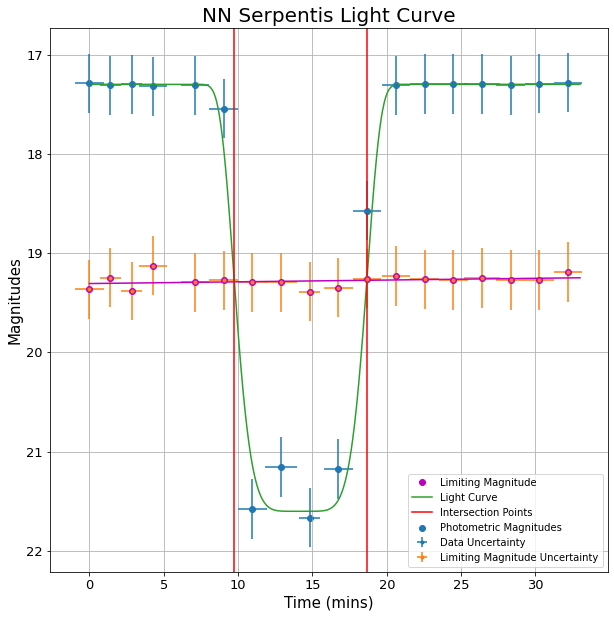

In [55]:
# Plotting light curve and data

plt.rcParams["figure.figsize"] = (10,10)
plt.gca().invert_yaxis()
plt.scatter(nnSer_times,nnSer_photometry[0],label='Photometric Magnitudes')
plt.plot(nnSer_times,nnSer_photometry[2],'mo',label='Limiting Magnitude')
plt.plot(xs,line(xs,*popt),'m-')
plt.errorbar(nnSer_times,nnSer_photometry[0],xerr=nnSer_timesErrors, yerr=nnSer_photometry[1],fmt='.',label='Data Uncertainty')
plt.errorbar(nnSer_times,nnSer_photometry[2],xerr=nnSer_timesErrors,yerr=nnSer_photometry[3],fmt='.',label='Limiting Magnitude Uncertainty')

plt.plot(xs,superGaussian(xs,4.3,0.000099,14.2,6,17.3),label='Light Curve')
#plt.plot(again,superGaussian(again,*popt1))
plt.xlabel('Time (mins)',fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Magnitudes',fontsize=15)
plt.yticks(fontsize=13)
plt.title('NN Serpentis Light Curve',fontsize=20)
plt.grid()
plt.axvline(x=9.745,color='red',label='Intersection Points')
plt.axvline(x=18.663,color='red')
plt.legend(); 
plt.savefig('lightCurve.eps')

In [ ]:
# Other messing around and testing functions - not used in final analysis

In [26]:
def gradient(x,a,b,c,d,e):
    part1 = a*np.exp(-b*((x-c)**d))
    part2 = -b*d*((x-c)**(d-1))
    return part1*part2
slopes = gradient(xs,4.3,0.000099,14.2,6,17.3)

def nonZeroSlope(slopes):
    point1 = np.where(slopes>0)
straightLine=(xs,line(xs,*popt))
curvy = (xs,superGaussian(xs,4.3,0.000099,14.2,6,17.3))

In [28]:
def twoLines(l1,l2): # find intersection point of two lines
    positions = []
    l1_coords = []
    l2_coords = []
    for i in range(len(l1[0])):
        for j in range(len(l1[1])):
            l1_coords.append((l1[0][i],l1[1][i]))
            l1_coords.append((l2[0][i],l2[1][i]))
    for k in range(len(l1_coords)):
        for m in range(len(l2_coords)):
            if l1_coords[i]==l2_coords[j]:
                positions.append(i)
    return positions

twoLines(straightLine,curvy)

[]